In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn.datasets import make_circles

In [156]:
import os
from os.path import join

# Add IDNN to path
cwd = os.getcwd()
parts = cwd.split('/raphael_dev')
ROOT = parts[0]
os.chdir(ROOT)
import sys
sys.path.insert(0, ROOT)

from IDNN.intrinsic_dimension import estimate, block_analysis

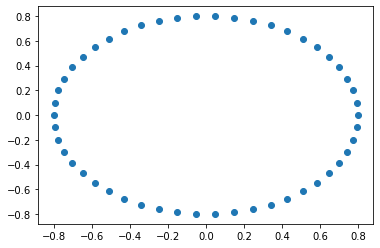

In [147]:
# Generate data cloud
binary_circle_data_set = make_circles(100)
circle_data_set = binary_circle_data_set[0][binary_circle_data_set[1]==1]

# Plot data cloud
plt.scatter(circle_data_set[:,0], circle_data_set[:,1])

In [148]:
# Compute distance matrix
dist_circle = distance_matrix(circle_data_set, circle_data_set)

In [149]:
# Estimate intrinsic dimension
_, _, id_circle, _, _ = estimate(dist_circle, verbose=True)

print('Estimated intrinsic dimension of circle_data_set: {:.2f}'.format(id_circle))

Found n. 0 elements for which r1 = 0
[]
Found n. 3 elements for which r1 = r2
[ 5 15 37]
Fraction good points: 0.94
Regression [[3.65986294e+14]]
Estimated intrinsic dimension of circle_data_set: 365986294402642.38


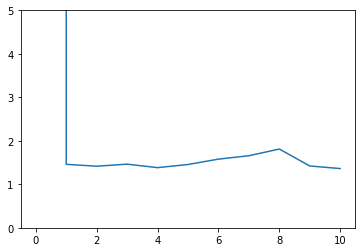

In [105]:
plt.plot(block_analysis(dist_circle, blocks=list(range(1, 12)))[0])
plt.ylim(0.,5.)
plt.show()

In [106]:
block_analysis(dist, blocks=list(range(1, 10)))[0]

array([3.65986294e+14, 1.55431921e+00, 1.40158037e+00, 1.44772755e+00,
       1.22674034e+00, 1.39359640e+00, 1.16763716e+00, 1.21925220e+00,
       1.28534585e+00])

In [78]:
sys.path.insert(0, '/home/reinauer/EPFL/gdeep')

In [236]:
import pandas as pd

from gdeep.create_data import make_torus_point_cloud, make_torus_dataset, Rotation, sample_torus_uniformely

In [114]:
pd_torus = make_torus_dataset()
torus_data_set = pd_torus[pd_torus.label==1.0][['x1','x2','x3']].to_numpy()

In [227]:
torus_data_set, _ = make_torus_point_cloud(0, 40, .2, Rotation(1,2,0.), np.array([[0,0,0]]), radius=1.)

In [251]:
torus_data_set = sample_torus_uniformely(n_samples=10000)

In [253]:
import plotly.express as px
df_torus = pd.DataFrame(torus_data_set, columns = ["x"+str(i) for i in range(3)])
px.scatter_3d(df_torus, x="x0",y="x1",z="x2")

In [254]:
# Compute distance matrix
dist_torus = distance_matrix(torus_data_set, torus_data_set)

In [255]:
# Estimate intrinsic dimension
_, _, id_torus, _, _ = estimate(dist_torus, verbose=True, fraction=0.1)

print('Estimated intrinsic dimension of torus_data_set: {:.2f}'.format(id_torus))

Found n. 0 elements for which r1 = 0
[]
Found n. 0 elements for which r1 = r2
[]
Fraction good points: 1.0
Regression [[1.93861918]]
Estimated intrinsic dimension of torus_data_set: 1.94


In [165]:
estimate(dist_torus, verbose=True, fraction=0.1)

Found n. 0 elements for which r1 = 0
[]
Found n. 0 elements for which r1 = r2
[]
Fraction good points: 1.0
Regression [[0.95606415]]


(array([1.06695483e-03, 1.06695483e-03, 1.06695483e-03, ...,
        2.01395473e+00, 2.01395473e+00, 2.01395473e+00]),
 array([4.00080021e-04, 8.00320171e-04, 1.20072058e-03, ...,
        6.43775165e+00, 6.72543372e+00, 7.13089883e+00]),
 0.956064147179579,
 0.9373012245472481,
 1.6022403133648436e-115)

.99318421]]
Regression [[2.00536384]]
Regression [[2.0711126]]
Regression [[1.97900504]]
Regression [[2.04041284]]
Regression [[2.05659894]]
Regression [[1.99328415]]
Regression [[1.99300274]]
Regression [[2.05096831]]
Regression [[1.94697977]]
Regression [[2.0472299]]
Regression [[1.95672914]]
Regression [[1.91610161]]
Regression [[1.95388238]]
Regression [[1.93582189]]
Regression [[2.01500467]]
Regression [[2.07833541]]
Regression [[2.10749742]]
Regression [[1.93388579]]
Regression [[2.01803603]]
Regression [[1.89462315]]
Regression [[1.92595052]]
Regression [[1.961283]]
Regression [[2.01598588]]
Regression [[1.99648504]]
Regression [[1.99999147]]
Regression [[2.053852]]
Regression [[1.98728642]]
Regression [[2.06165242]]
Regression [[2.01555934]]
Regression [[1.97945946]]
Regression [[2.00537185]]
Regression [[2.0206603]]
Regression [[1.90664437]]
Regression [[1.92665428]]
Regression [[2.04279741]]
Regression [[1.96034795]]
Regression [[1.88429574]]
Regression [[1.98392526]]
Regress

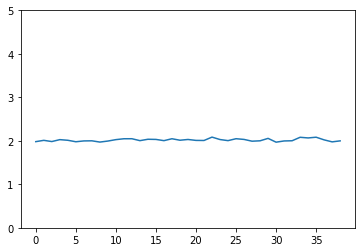

In [256]:
plt.plot(block_analysis(dist_torus, blocks=list(range(1, 40)))[0])
plt.ylim(0.,5.)
plt.show()

In [133]:
block_analysis(dist_torus, blocks=list(range(1, 10)))

(array([1.01324816, 1.60950493, 1.46221908, 1.41268534, 1.42317389,
        1.33879909, 1.45308398, 1.38039424, 1.50875968]),
 array([0.        , 0.03559681, 0.02240171, 0.07440602, 0.06782638,
        0.14071285, 0.12468107, 0.08302585, 0.16712964]),
 [2500, 1250, 833, 625, 500, 416, 357, 312, 277])

In [170]:
from TwoNN import twonn_dimension

twonn_dimension(dist_torus)

KeyboardInterrupt: 

In [233]:
a, b, c = tuple(np.random.uniform(0., 1., 3))

In [234]:
a

0.8327003986334028

In [275]:
from mpl_toolkits.mplot3d import Axes3D
from pydiffmap import diffusion_map as dm

neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}

mydmap = dm.DiffusionMap.from_sklearn(n_evecs=3, k=200, epsilon='bgh', alpha=1.0, neighbor_params=neighbor_params)
# fit to data and return the diffusion map.
dmap = mydmap.fit_transform(torus_data_set)

np.ptp(dmap, axis=0)

array([0.02969221, 0.02975354, 0.01681889])

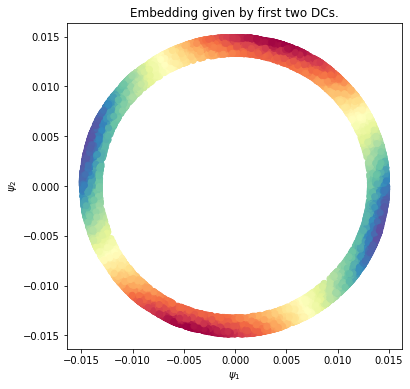

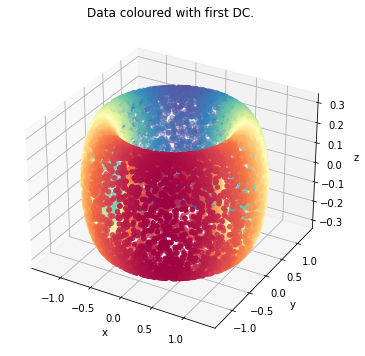

In [282]:
from pydiffmap.visualization import embedding_plot, data_plot

embedding_plot(mydmap, scatter_kwargs = {'c': dmap[:,2], 'cmap': 'Spectral'})
data_plot(mydmap, dim=3, scatter_kwargs = {'cmap': 'Spectral'})

plt.show()

Correlation between \phi and \psi_1
[[ 1.        -0.4039242]
 [-0.4039242  1.       ]]
Correlation between Z and \psi_2
[[1.         0.02844287]
 [0.02844287 1.        ]]


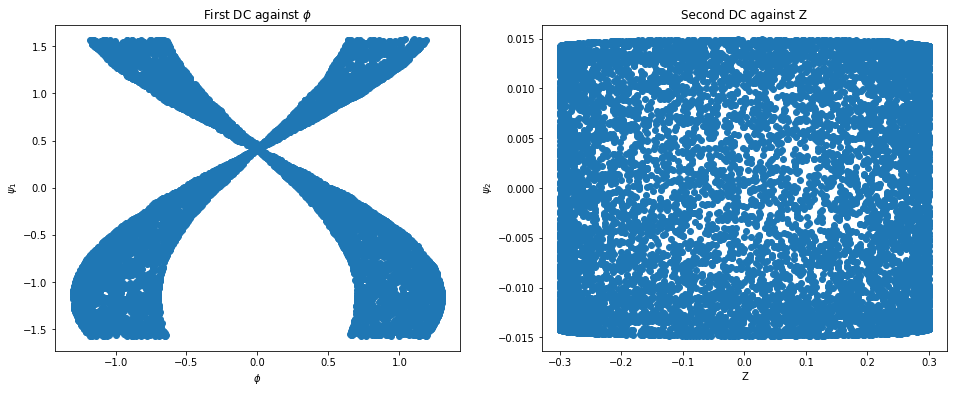

In [280]:
print('Correlation between \phi and \psi_1')
print(np.corrcoef(dmap[:,0], torus_data_set[:,0]))

plt.figure(figsize=(16,6))
ax = plt.subplot(121)
ax.scatter(torus_data_set[:,0], np.arctan(dmap[:,1]/dmap[:,0]))
ax.set_title('First DC against $\phi$')
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\psi_1$')
ax.axis('tight')

print('Correlation between Z and \psi_2')
print(np.corrcoef(dmap[:,1], torus_data_set[:,2]))

ax2 = plt.subplot(122)
ax2.scatter(torus_data_set[:,2], dmap[:,1])
ax2.set_title('Second DC against Z')
ax2.set_xlabel('Z')
ax2.set_ylabel(r'$\psi_2$')

plt.show()

In [334]:
n = 10 # sphere dimension
m = 9 # embedding dimension
assert n>=m
n_samples = 10000 # number of sample_points
normal_points = np.random.multivariate_normal(np.zeros(m), np.eye(m), n_samples)
sphere_sample_points = normal_points/np.linalg.norm(normal_points, axis=-1)[:, np.newaxis]

embedded_sphere_sample_points = np.concatenate((sphere_sample_points, np.zeros((n_samples, n-m))), -1)

In [312]:
mydmap = dm.DiffusionMap.from_sklearn(n_evecs=10, k=200, epsilon='bgh', alpha=1.0, neighbor_params=neighbor_params)
# fit to data and return the diffusion map.
dmap = mydmap.fit_transform(torus_data_set)

np.std(dmap, axis=0)

array([0.01010399, 0.01005768, 0.00517823, 0.00516601, 0.00357952,
       0.00356174, 0.00306979, 0.00299574, 0.00293569, 0.00293045])

In [335]:
# Compute distance matrix
dist_sphere = distance_matrix(embedded_sphere_sample_points, embedded_sphere_sample_points)

In [337]:
# Estimate intrinsic dimension
_, _, id_circle, _, _ = estimate(dist_sphere, verbose=True)

print('Estimated intrinsic dimension of circle_data_set: {:.2f}'.format(id_circle))

Found n. 0 elements for which r1 = 0
[]
Found n. 0 elements for which r1 = r2
[]
Fraction good points: 1.0
Regression [[7.6392317]]
Estimated intrinsic dimension of circle_data_set: 7.64


In [316]:
circle_data_set

array([[ 0.00363856, -0.01349063,  0.00659737, ...,  0.00290835,
        -0.00275746, -0.00451474],
       [-0.00958719,  0.00941714,  0.0029173 , ...,  0.00289984,
         0.0030718 ,  0.00271969],
       [-0.00843079,  0.01104257,  0.00477777, ...,  0.00345111,
        -0.00387892, -0.00329531],
       ...,
       [-0.01349484,  0.00312589, -0.003465  , ...,  0.00324925,
        -0.00508   ,  0.00013102],
       [ 0.01112592,  0.00709681, -0.00452597, ...,  0.00482184,
         0.00018689,  0.00218387],
       [-0.00611509, -0.01360178,  0.00159394, ..., -0.00321067,
        -0.0004644 , -0.00170004]])

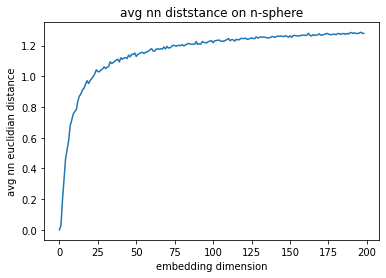

In [73]:
for n_samples in range(100, 200, 100): # number of sample_points
    avg_dist = []
    for m in range(1,200):
        normal_points = np.random.multivariate_normal(np.zeros(m), np.eye(m), n_samples)
        sphere_sample_points = normal_points/np.linalg.norm(normal_points, axis=-1)[:, np.newaxis]
        dist_sphere = distance_matrix(sphere_sample_points, sphere_sample_points)
        avg_dist.append(np.amin(dist_sphere + np.diag([np.inf] * n_samples), axis=0).mean())
    plt.plot(avg_dist)
plt.title('avg nn diststance on n-sphere')
plt.xlabel('embedding dimension')
plt.ylabel('avg nn euclidian distance')
plt.show()

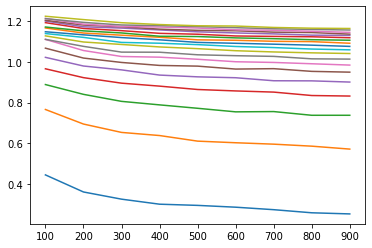

In [384]:
n_samples_range = range(100, 1000, 100)
for m in range(5, 100, 5):
    avg_dist=[]
    for n_samples in n_samples_range: # number of sample_points
            normal_points = np.random.multivariate_normal(np.zeros(m), np.eye(m), n_samples)
            sphere_sample_points = normal_points/np.linalg.norm(normal_points, axis=-1)[:, np.newaxis]
            dist_sphere = distance_matrix(sphere_sample_points, sphere_sample_points)
            avg_dist.append(np.amin(dist_sphere + np.diag([np.inf] * n_samples), axis=0).mean())
    plt.plot(n_samples_range,avg_dist)
plt.show()

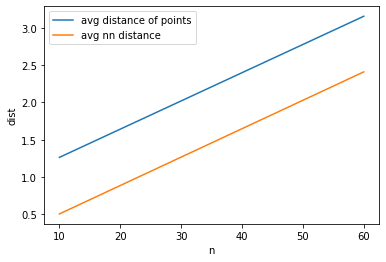

In [10]:
N = 1000 # number of sample points
n_range = range(10,100,50) # cube dimension
avg_dist = []
for n in n_range:
    sample_points_cube = np.random.uniform(0.,1., (N, n))
    distance_cube = distance_matrix(sample_points_cube, sample_points_cube)
    avg_dist.append(distance_cube.mean())
plt.plot(n_range, avg_dist, label = 'avg distance of points')

avg_nn_dist = []
N=1000
for n in n_range:
    sample_points_cube = np.random.uniform(0.,1., (N, n))
    distance_cube = distance_matrix(sample_points_cube, sample_points_cube)
    avg_nn_dist.append(np.amin(distance_cube + np.diag([np.inf] * N), axis=0).mean())
plt.plot(n_range, avg_nn_dist, label='avg nn distance')

plt.xlabel('n')
plt.ylabel('dist')
plt.legend()
plt.show()

# Minimal average distance in an n-dimensional cube with N=1000 sample points

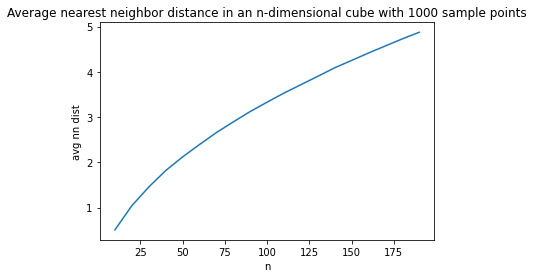

In [70]:
N = 1000 # number of sample points
n_range = range(10, 200, 10) # cube dimension
avg_nn_dist = []
for n in n_range:
    sample_points_cube = np.random.uniform(0.,1., (N, n))
    distance_cube = distance_matrix(sample_points_cube, sample_points_cube)
    avg_nn_dist.append(np.amin(distance_cube + np.diag([np.inf] * N), axis=0).mean())
plt.plot(n_range, avg_nn_dist)

plt.title(f'Average nearest neighbor distance in an n-dimensional cube with {N} sample points')
plt.xlabel('n')
plt.ylabel('avg nn dist')
plt.show()

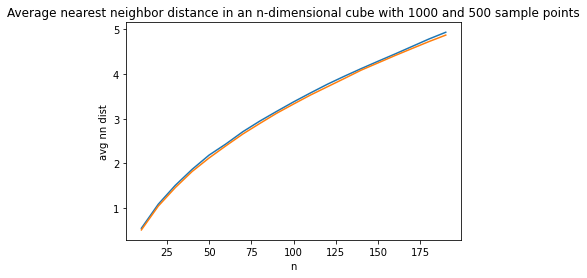

In [72]:
N = 500 # number of sample points
n_range_half = range(10, 200, 10) # cube dimension
avg_nn_dist_half = []
for n in n_range_half:
    sample_points_cube = np.random.uniform(0.,1., (N, n))
    distance_cube = distance_matrix(sample_points_cube, sample_points_cube)
    avg_nn_dist_half.append(np.amin(distance_cube + np.diag([np.inf] * N), axis=0).mean())
plt.plot(n_range_half, avg_nn_dist_half)
plt.plot(n_range, avg_nn_dist)
plt.title(f'Average nearest neighbor distance in an n-dimensional cube with {2*N} and {N} sample points')
plt.xlabel('n')
plt.ylabel('avg nn dist')
plt.show()

They both have the complexity $O(\sqrt{n})$ and are exponential in $N$.

# Average distance to random hyperplane in n-dimesional cube

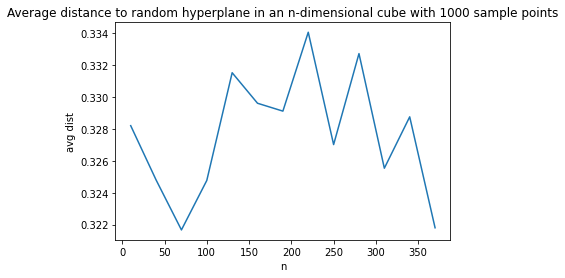

In [67]:
N = 1000 # number of sample points
n_hyper = 1000
n_range = range(10, 400, 30) # cube dimension
avg_dist_to_hyp = []

for n in n_range:
    # Create random hyperplane
    base_point = np.random.uniform(0.,1., (n_hyper, n))
    unnormalized_direction = np.random.multivariate_normal(np.zeros(n), np.eye(n), n_hyper)
    normal_vector = (unnormalized_direction/np.linalg.norm(unnormalized_direction, axis=1)[:, np.newaxis])
    base_val = np.einsum('ij,ij->i', base_point, normal_vector)

    # Create N random vectors in n-dimensional hypercube
    sample_points_cube = np.random.uniform(0.,1., (N, n))

    dist_to_hyp = np.abs(np.einsum('ij,kj->ik', normal_vector, sample_points_cube) - base_val[:, np.newaxis])
    avg_dist_to_hyp.append(dist_to_hyp.mean())

# Plot average distance to random hyperplane
plt.plot(n_range, avg_dist_to_hyp)

plt.title(f'Average distance to random hyperplane in an n-dimensional cube with {N} sample points')
plt.xlabel('n')
plt.ylabel('avg dist')
plt.show()

The avg distance to a random point in an $n$-dimensional hypercube has the complexity $O(1)$.